In [217]:
# Cellule d'import des librairies 
import os 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
from pathlib import Path

In [218]:
# Folder names 
modelFolder = Path("D:\\Master Thesis\\temp\\temp20230714\\all models results")

In [219]:
# Cellule d'import des fichiers 
# Ground Truth 
GTfolder = Path("./data/test/masks/") 

# Resultats 
modelNames = [
    "celestial-bird-58", 
    "cool-lion-105", 
    "lilac-wildflower-117"
]
nbOfModels = len(modelNames)
allFiles = []
for modelName in modelNames: 
    allFiles.append([f for f in (modelFolder/modelName).iterdir() if f.is_file()])
# print(allFiles)

# GT we keep 
allFilenames = [[f.stem for f in allFiles[i]] for i in range(nbOfModels)]
# print(len(allFilenames))

allGT = []
for f in GTfolder.iterdir(): 
    if f.is_file(): 
        i = 0 
        while i < nbOfModels and f.stem in allFilenames[i]: 
            i += 1 
        if i >= nbOfModels: 
            allGT.append(f)
nGT = len(allGT)

# print(nGT)

In [220]:
# Create lists of images 
allModelResults = []
for i in range(nbOfModels): 
    allModelResults.append([cv.imread(str(img), cv.IMREAD_GRAYSCALE) for img in allFiles[i]])

allGTarrays = [cv.imread(str(img)) for img in allGT]

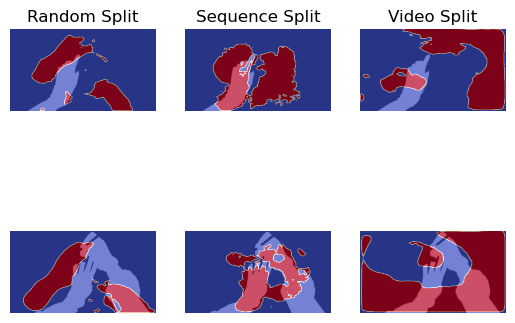

In [224]:
n = nGT
nbFolder = nbOfModels
fig, axs = plt.subplots(nrows=n, ncols=nbOfModels) #, figsize=(50,40)) #, constrained_layout=True)
# fig.suptitle(t="Segmentation results")

for i in range(n): 
    for j in range(nbOfModels): 
        axs[i][j].imshow(allGTarrays[i])
        axs[i][j].imshow(allModelResults[j][i], alpha = 0.7, cmap='coolwarm')
        axs[i][j].axis('off')

# Put Title to columns 
coltitles = ["Random Split", "Sequence Split", "Video Split"]
# coltitles = modelNames 
for ax, col in zip(axs[0], coltitles):
    ax.set_title(col)

plt.show()